In [17]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt


In [18]:
def capture_eye_image(filename='iris.jpg'):
    cap = cv2.VideoCapture(0)
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    print("Press 'c' to capture or 'q' to quit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in eyes:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, "Press 'c' to capture", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)
            break

        cv2.imshow("Capture Iris", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            if len(eyes) > 0:
                (x, y, w, h) = eyes[0]
                eye_img = frame[y:y+h, x:x+w]
                cv2.imwrite(filename, eye_img)
                print(f"✅ Saved as '{filename}'")
            else:
                print("❌ No eye detected.")
            break
        elif key == ord('q'):
            print("❌ Quit without saving.")
            break

    cap.release()
    cv2.destroyAllWindows()


In [19]:
# First capture reference image
capture_eye_image('iris_ref.jpg')

# Then capture live image
capture_eye_image('iris_live.jpg')


Press 'c' to capture or 'q' to quit.
✅ Saved as 'iris_ref.jpg'
Press 'c' to capture or 'q' to quit.
✅ Saved as 'iris_live.jpg'


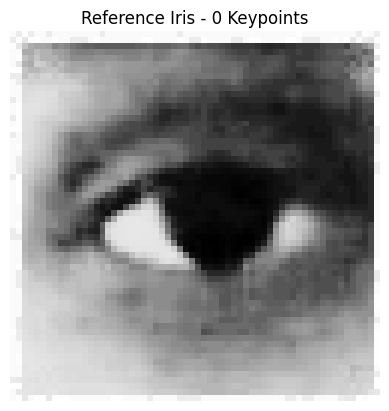

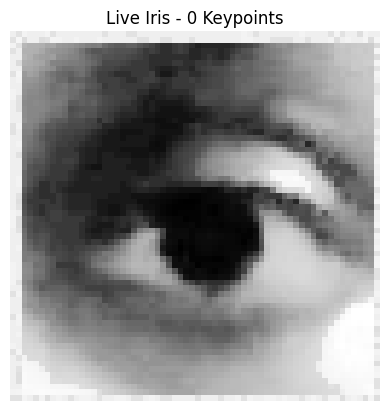

((), None)

In [20]:
def preprocess(img):
    return cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def show_keypoints(img_path, title='Image'):
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Image not found: {img_path}")
        return None, None
    gray = preprocess(img)
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(gray, None)
    img_kp = cv2.drawKeypoints(gray, kp, None, color=(0,255,0))
    plt.imshow(img_kp, cmap='gray')
    plt.title(f"{title} - {len(kp)} Keypoints")
    plt.axis('off')
    plt.show()
    return kp, des

# Show reference and live keypoints
show_keypoints('iris_ref.jpg', 'Reference Iris')
show_keypoints('iris_live.jpg', 'Live Iris')


In [21]:
pip install opencv-contrib-python



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
capture_eye_image('iris_ref.jpg')  # reference first
capture_eye_image('iris_live.jpg')  # live next


Press 'c' to capture or 'q' to quit.
✅ Saved as 'iris_ref.jpg'
Press 'c' to capture or 'q' to quit.
✅ Saved as 'iris_live.jpg'


✅ SIFT Match Score: 7


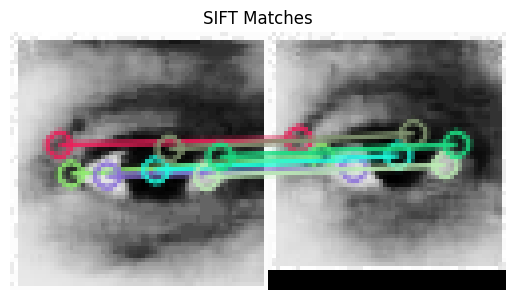

🔐 Iris Match: Failed ❌


In [23]:
def match_iris_sift(ref_path='iris_ref.jpg', live_path='iris_live.jpg'):
    ref_img = cv2.imread(ref_path)
    live_img = cv2.imread(live_path)

    if ref_img is None or live_img is None:
        print("❌ One or both images not found.")
        return False

    ref_gray = preprocess(ref_img)
    live_gray = preprocess(live_img)

    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(ref_gray, None)
    kp2, des2 = sift.detectAndCompute(live_gray, None)

    if des1 is None or des2 is None:
        print("❌ Descriptors missing in one of the images.")
        return False

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Lowe's ratio test
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    print("✅ SIFT Match Score:", len(good))

    match_img = cv2.drawMatches(ref_gray, kp1, live_gray, kp2, good[:20], None, flags=2)
    plt.imshow(match_img, cmap='gray')
    plt.title('SIFT Matches')
    plt.axis('off')
    plt.show()

    return len(good) >= 25

# Run SIFT-based matcher
result = match_iris_sift()
print("🔐 Iris Match:", "Success ✅" if result else "Failed ❌")


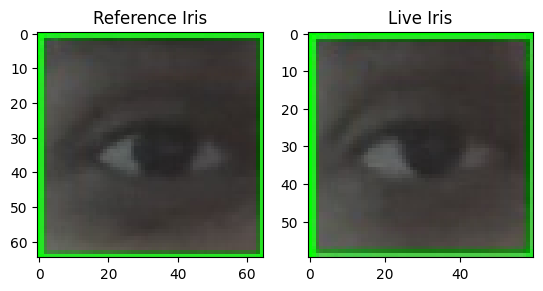

In [24]:
import matplotlib.pyplot as plt

ref_img = cv2.imread('iris_ref.jpg')
live_img = cv2.imread('iris_live.jpg')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB))
plt.title("Reference Iris")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(live_img, cv2.COLOR_BGR2RGB))
plt.title("Live Iris")

plt.show()
